In [1]:
import os
from openai import OpenAI
from dotenv import load_dotenv
import base64

# Import for image display
from PIL import Image
import matplotlib.pyplot as plt

load_dotenv()

XAI_API_KEY = os.getenv("XAI_API_KEY")

client = OpenAI(
    api_key=XAI_API_KEY,
    base_url="https://api.x.ai/v1",
)

In [2]:
image_path = "../images/pancakes.jpg"


# Open and display the image
img = Image.open(image_path)
plt.figure(figsize=(3,3))
plt.imshow(img)
plt.axis('off')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Projects\\AI_Applications\\images\\pancakes.jpg'

In [4]:
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode("utf-8")
    return encoded_string

base64_image = encode_image(image_path)

In [11]:
messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{base64_image}",
                    "detail": "high",
                },
            },
            {
                "type": "text",
                "text": """
                You are a food nutriionist. Analyze the image and provide a detailed analysis of the food in the image. 
                Respond in the following Json format: v
                {"food_name": "name of the food", "calories": "0", "protein": "0", "carbs": "0", "fat": "0", "health_score": "0"}

                Notes: 
                1. Only provide the Json response. 
                2. List only integer values for calories, protein, carbs, and fat. 
                """,


            },
        ],
    },
]

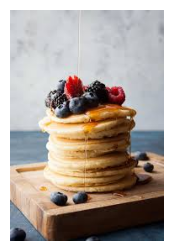

```json
{
  "food_name": "Pancakes with Berries and Syrup",
  "calories": 600,
  "protein": 10,
  "carbs": 100,
  "fat": 20,
  "health_score": 5
}
```None

In [15]:
stream = client.chat.completions.create(
    model="grok-vision-beta",
    messages=messages,
    stream=True,
    temperature=0.01,
)

plt.figure(figsize=(3,3))
plt.imshow(img)
plt.axis('off')
plt.show()

# Print the response
for chunk in stream:
    print(chunk.choices[0].delta.content, end="", flush=True)